

# Customer Purchase Prediction

*Importing* *Libraries*

In [1]:
import pandas as pd #useful for loading the data
import numpy as np #to perform array


  *Chosse Dataset file from Local Directory*

In [3]:
from google.colab import files
uploaded = files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset.csv


*Load Dataset*


In [4]:
dataset = pd.read_csv('DigitalAd_dataset.csv')

*Summarize Dataset*

In [ ]:
print(dataset.shape)
print(dataset.head(10))

*Segregate Dataset into X(Input/Independent Variable) & Y(Output/Dependent Variable)*

In [ ]:
X = dataset.iloc[:,:-1].values
X

In [ ]:
Y = dataset.iloc[:,-1].values
Y

## *Splitting Dataset into Train & Test*

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# **Feature Scaling**

## **Why Feature Scaling?**

*Imagine you have two friends running a race:*

One runs Age (20–60 years) → **small numbers**

One runs Salary (20,000–80,000) → **very big numbers**

*If we don’t scale, the model will think Salary is more important just because the numbers are bigger.*

*But in reality, both Age and Salary should matter equally.*

**Feature scaling makes all features run on the same track (same scale), so the model treats them fairly.**

**Fit** = *Learn the rules from training data.*

**Transform** = *Apply those rules.*

**Training data** → *Fit + Transform.*

**Test data** → *Only Transform.*

In [11]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

# *Training*  

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

# Predicting, wheather new customer with Age & Salary will Buy or Not

In [ ]:
age = int(input("Enter New Customer Age: "))
sal = int(input("Enter New Customer Salary: "))
newCust = [[age,sal]]
result = model.predict(Sc.transform(newCust))
print(result)
if result == 1:
  print("Customer will Buy")
else:
  print("Customer won't Buy")

# Predication for all Test Data  

In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# 📊Evaluating Model

 **Confusion Matrix & Accuracy**

The **confusion matrix** is a way to evaluate classification models.

| Actual \ Predicted | Positive | Negative |
|--------------------|----------|----------|
| **Positive**       | True Positive (TP) | False Negative (FN) |
| **Negative**       | False Positive (FP) | True Negative (TN) |

---

###  Accuracy Formula

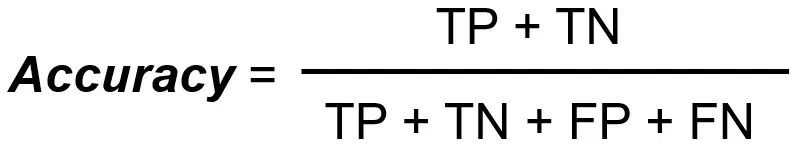


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))
